#Brain Tumor Detection using a Convolutional Neural Network
NAOMI IGLESIAS HERNÁNDEZ 1991862
YULISSA PONCE SALAZAR 1894765
LIDIA MARÍA SOTO VALVERDE 1992303
LUIS ANTONIO RAMÍREZ GARZA 1991893



In [ ]:
# Importing libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection   import train_test_split
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from PIL import Image
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Activation, Dropout, Flatten,Dense

#Preprocessing

In [ ]:
# Import the dataset
from google.colab import files
uploaded= files.upload()

Saving archive.zip to archive.zip


In [ ]:
import zipfile
import io
data=zipfile.ZipFile(io.BytesIO(uploaded["archive.zip"]),"r")
data.extractall()

In [ ]:
# Rescaling
image_directory="brain_tumor_dataset/"
no_tumor =os.listdir(image_directory+"no/")
yes_tumor =os.listdir(image_directory+"yes/")
dataset=[]
label=[]
print(no_tumor)
print(yes_tumor)
print(len(no_tumor))
print(len(yes_tumor))

['no 98.jpg', 'N15.jpg', 'N6.jpg', '47 no.jpg', 'N17.jpg', '42 no.jpg', 'No13.jpg', '11 no.jpg', 'no 99.jpg', '45 no.jpg', 'No17.jpg', 'no 89.jpg', '30 no.jpg', '27 no.jpg', '36 no.jpg', 'N16.jpg', '24 no.jpg', '20 no.jpg', '48 no.jpeg', 'no 8.jpg', 'No21.jpg', '7 no.jpg', 'N1.JPG', 'N19.JPG', '4 no.jpg', '22 no.jpg', 'N11.jpg', '17 no.jpg', 'N20.JPG', 'no 5.jpeg', '8 no.jpg', 'No14.jpg', 'No19.jpg', 'No20.jpg', '32 no.jpg', 'no 92.jpg', '28 no.jpg', 'no 97.jpg', '1 no.jpeg', '12 no.jpg', '10 no.jpg', '29 no.jpg', 'No16.jpg', 'N26.JPG', '40 no.jpg', '6 no.jpg', '3 no.jpg', 'no 1.jpg', '14 no.jpg', '39 no.jpg', '23 no.jpg', '26 no.jpg', '38 no.jpg', 'no.jpg', '21 no.jpg', 'No11.jpg', 'no 7.jpeg', '46 no.jpg', '34 no.jpg', 'No12.jpg', 'no 6.jpg', 'N22.JPG', '43 no.jpg', '25 no.jpg', 'No22.jpg', '2 no.jpeg', '15 no.jpg', '50 no.jpg', 'no 100.jpg', '44no.jpg', 'no 94.jpg', '18 no.jpg', 'no 4.jpg', 'no 9.png', '19 no.jpg', 'no 95.jpg', '5 no.jpg', 'No15.jpg', 'no 96.jpg', '35 no.jpg', '41 n

In [ ]:
for i, image_name in enumerate(no_tumor):
    image=cv2.imread(image_directory+"no/"+image_name)
    image=Image.fromarray(image, "RGB")
    image=image.resize((200,200))
    dataset.append(np.array(image))
    label.append(0)

In [ ]:
for i, image_name in enumerate(yes_tumor):
    image=cv2.imread(image_directory+"yes/"+image_name)
    image=Image.fromarray(image, "RGB")
    image=image.resize((200,200))
    dataset.append(np.array(image))
    label.append(1)

In [ ]:
#Convert to numpy
dataset = np.array(dataset)
label = np.array(label)

In [ ]:
# Class definition
class_names = ['NO', 'YES']

#Structure and trainning of RNAC

In [ ]:
#We will split the data: 80% training, 20% validation
train_images, test_images, train_labels, test_labels = train_test_split(dataset, label, test_size= 0.2, random_state= 42)

In [ ]:
# Exploring the dataset
print(train_images.shape)
len(train_labels)

(202, 200, 200, 3)


202

In [ ]:
train_labels

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1])

In [ ]:
print(test_images.shape)
len(test_labels)

(51, 200, 200, 3)


51

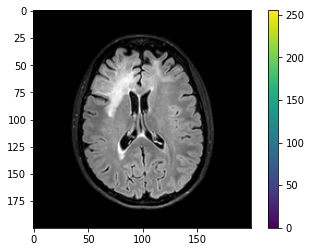

In [ ]:
plt.figure()
plt.imshow(train_images[30])
plt.colorbar()
plt.grid(False)
plt.show()


In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

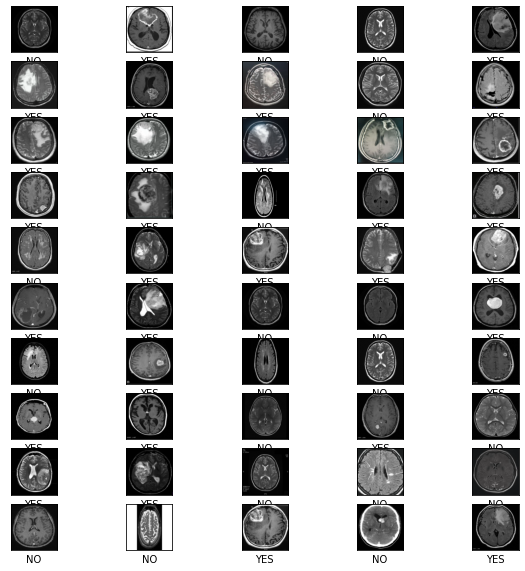

In [ ]:
plt.figure(figsize=(10,10)) # Total dimension
for i in range(50):  # show 25 images
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# Convolutional part of RNAC
model = models.Sequential()
model.add(layers.Conv2D (32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D (64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D (64, (3, 3), activation='relu'))

In [ ]:
# Classification
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense((2), activation = 'softmax'
))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 135424)            0

In [ ]:
# Model compilation: features
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# RNAC trainning
history = model.fit(train_images, train_labels, epochs=20,
validation_split= 0.1)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


6/6 [==============================] - 14s 2s/step - loss: 1.1664 - accuracy: 0.6409 - val_loss: 0.5158 - val_accuracy: 0.8571
Epoch 2/20
6/6 [==============================] - 13s 2s/step - loss: 0.5271 - accuracy: 0.7901 - val_loss: 0.4089 - val_accuracy: 0.8571
Epoch 3/20
6/6 [==============================] - 12s 2s/step - loss: 0.4038 - accuracy: 0.8508 - val_loss: 0.4331 - val_accuracy: 0.8571
Epoch 4/20
6/6 [==============================] - 12s 2s/step - loss: 0.3653 - accuracy: 0.8287 - val_loss: 0.3798 - val_accuracy: 0.8571
Epoch 5/20
6/6 [==============================] - 12s 2s/step - loss: 0.2463 - accuracy: 0.9061 - val_loss: 0.4875 - val_accuracy: 0.6667
Epoch 6/20
6/6 [==============================] - 12s 2s/step - loss: 0.2335 - accuracy: 0.9006 - val_loss: 0.3390 - val_accuracy: 0.9048
Epoch 7/20
6/6 [==============================] - 12s 2s/step - loss: 0.1306 - accuracy: 0.9613 - val_loss: 0.4313 - val_accuracy: 0.8571
Epoch 8/20
6/6 [=============================

In [ ]:
def training_plot(metrics, history):
  f, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))
  for idx, metric in enumerate(metrics):
    ax[idx].plot(history.history[metric], ls='dashed')
    ax[idx].set_xlabel("Epochs")
    ax[idx].set_ylabel(metric)
    ax[idx].plot(history.history['val_' + metric]);
    ax[idx].legend([metric, 'val_' + metric])

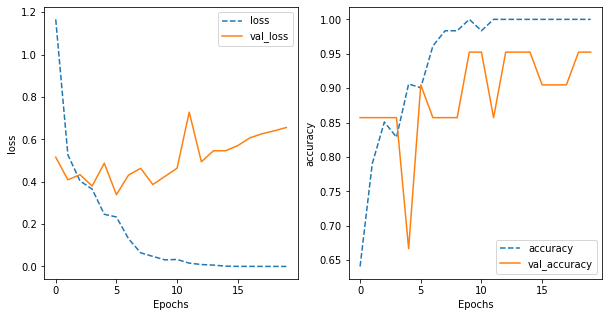

In [ ]:
training_plot(['loss', 'accuracy'], history)

#Results of RNAC accuracy

2/2 - 1s - loss: 1.2873 - accuracy: 0.8627 - 942ms/epoch - 471ms/step


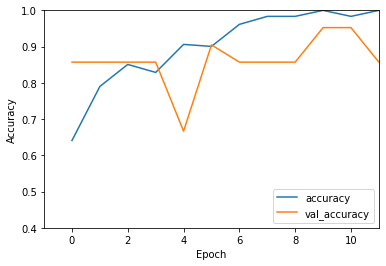

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.xlim([-1, 11])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
model.evaluate(test_images, test_labels)

2/2 [==============================] - 1s 357ms/step - loss: 1.2873 - accuracy: 0.8627


[1.2872966527938843, 0.8627451062202454]

Predictions

In [ ]:
predictions = model.predict((test_images)>0.5).astype(int).ravel()


2/2 [==============================] - 1s 355ms/step


In [ ]:
test_images.shape, test_labels.shape

((51, 200, 200, 3), (51,))

In [ ]:
for i in range(10):
  x = predictions[i]
  y = test_labels[i]
  print("La red dice que la imagen es clase " + str(x) + " y la clase verdadera es: " + str(y))

La red dice que la imagen es clase 0 y la clase verdadera es: 1
La red dice que la imagen es clase 0 y la clase verdadera es: 0
La red dice que la imagen es clase 0 y la clase verdadera es: 0
La red dice que la imagen es clase 0 y la clase verdadera es: 1
La red dice que la imagen es clase 0 y la clase verdadera es: 1
La red dice que la imagen es clase 0 y la clase verdadera es: 1
La red dice que la imagen es clase 0 y la clase verdadera es: 1
La red dice que la imagen es clase 0 y la clase verdadera es: 1
La red dice que la imagen es clase 0 y la clase verdadera es: 0
La red dice que la imagen es clase 0 y la clase verdadera es: 0
